<a href="https://colab.research.google.com/github/V2035/netflix-office-analysis/blob/main/Copy_of_Netflix_and_The_Office_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name

Netflix and The Office Analysis

Project Type

Data Analysis and Visualization

Project Prepared By

vasavi Kanikicharla

Project Summary

This project analyzes guest star appearances in The Office alongside Netflix content trends over time. It explores how the presence of notable guest stars correlates with Netflix additions and analyzes temporal trends using text analysis and visualizations to better understand audience behavior and content strategy.

GitHub Link

Problem Statement

How do guest star appearances in *The Office* relate to Netflix content trends over time?
This project analyzes patterns between guest stars, episode ratings, and Netflix additions using data visualization.


Coding

Load Dataset Files

In [ ]:
import pandas as pd

netflix_df = pd.read_csv('/content/netflix_titles.csv')
office_df = pd.read_csv('/content/the_office_series.csv')

print(netflix_df.head())
print(office_df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Removal of Exact duplicates

In [ ]:
netflix_df.drop_duplicates(inplace=True)
office_df.drop_duplicates(inplace=True)


Fix Inconsistent Entries

In [ ]:
netflix_df['title'] = netflix_df['title'].str.strip()
office_df['EpisodeTitle'] = office_df['EpisodeTitle'].str.strip()


Handle Missing Values

In [ ]:
netflix_df.fillna('Unknown', inplace=True)
office_df.fillna('Unknown', inplace=True)

office_df['GuestStars'] = office_df['GuestStars'].fillna('Unknown')


Detect and Treat Outliers

In [ ]:

netflix_df = netflix_df[netflix_df['release_year'] > 1900]


Scaling and Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

netflix_df['release_year_scaled'] = scaler.fit_transform(netflix_df[['release_year']])


Encoding Categorical Data

In [ ]:
netflix_df = pd.get_dummies(netflix_df, columns=['type'])


Text Data

In [ ]:

office_df['guest_star_count'] = office_df['GuestStars'].apply(lambda x: len(str(x).split(',')))


Feature Engineering

In [ ]:
netflix_df['year_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce').dt.year
office_df['year_aired'] = pd.to_datetime(office_df['Date'], errors='coerce').dt.year


feature Selection

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features = ['release_year', 'year_added']
netflix_pca_data = netflix_df[features].dropna()

pca_result = pca.fit_transform(netflix_pca_data)

netflix_df.loc[netflix_pca_data.index, 'pca_one'] = pca_result[:, 0]
netflix_df.loc[netflix_pca_data.index, 'pca_two'] = pca_result[:, 1]


Balance the Classes

In [ ]:
from imblearn.over_sampling import SMOTE

if 'type_Movie' in netflix_df.columns:
    smote = SMOTE()
    X = netflix_df[['release_year_scaled']].dropna()
    y = netflix_df['type_Movie'].dropna()
    X_res, y_res = smote.fit_resample(X, y)


Titles graph

/tmp/ipython-input-2768045986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=netflix_df, palette='viridis')


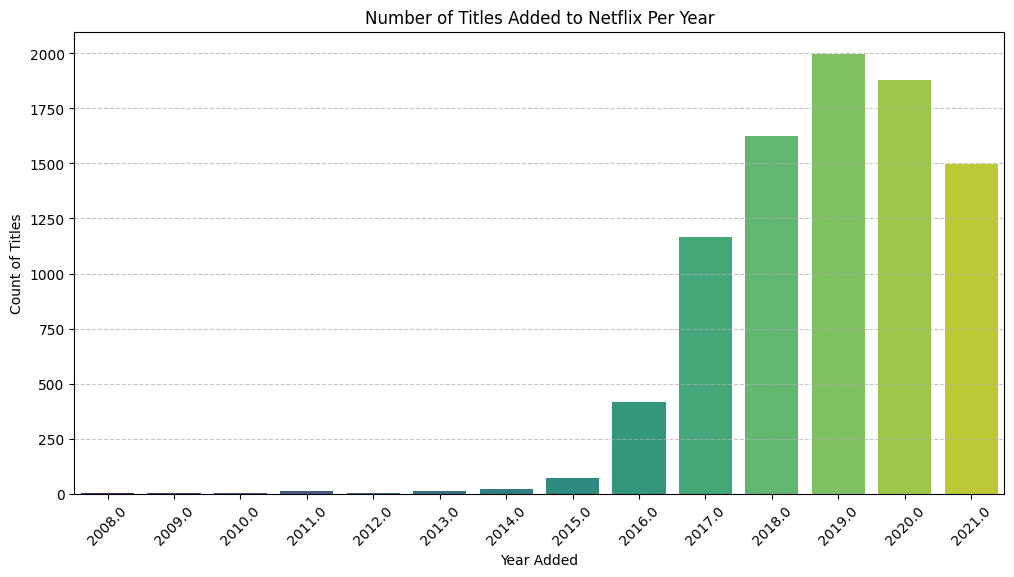

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=netflix_df, palette='viridis')
plt.title('Number of Titles Added to Netflix Per Year')
plt.xlabel('Year Added')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Countries graph

/tmp/ipython-input-1975548191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')


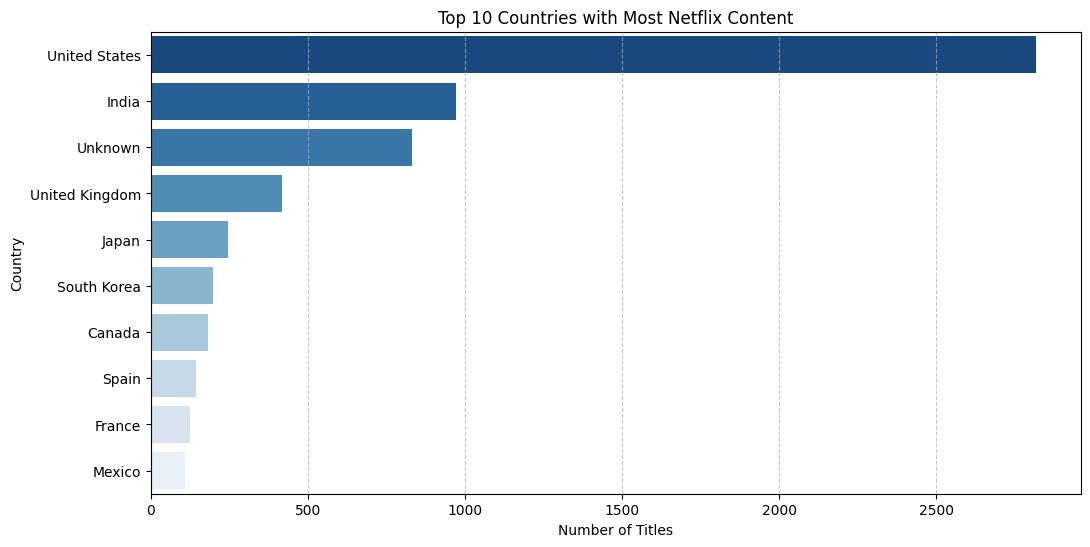

In [ ]:
top_countries = netflix_df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Episode Rating graph

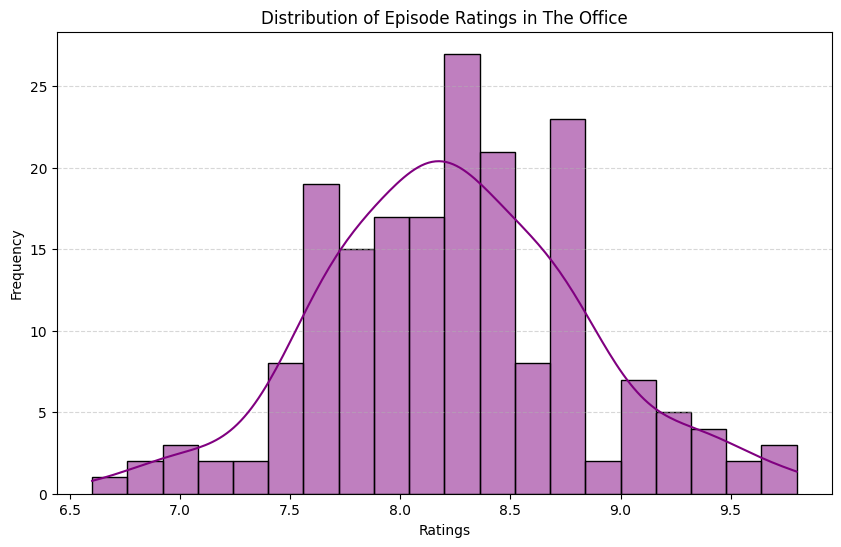

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(office_df['Ratings'], bins=20, kde=True, color='purple')
plt.title('Distribution of Episode Ratings in The Office')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Viewership,Rating graph

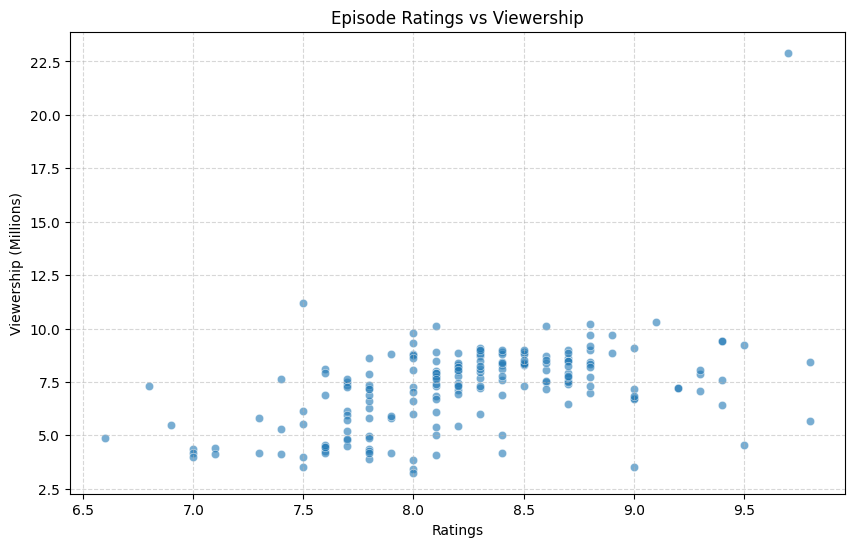

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Viewership', data=office_df, alpha=0.6)
plt.title('Episode Ratings vs Viewership')
plt.xlabel('Ratings')
plt.ylabel('Viewership (Millions)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
